In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option ('display.max_columns', None)

In [5]:
### import our dataset
df= pd.read_csv('stats_and_contracts.csv')
df= df.drop(columns='Unnamed: 0')

In [6]:
df.head()

,Player,Season,AGE,Pos_C,Pos_LW,Pos_RW,Pos_D,Pos_G,GP,G,...,SV_Pct,GAA,SUT,GPS,MIN,QS,RBS,TYPE,LENGTH,AAV
0,Wayne Simmonds,2021,32,0,1,1,0,0,61.666667,10.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,2,900000
1,Ryan Nugent-Hopkins,2021,28,1,1,0,0,0,66.333333,22.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,8,5125000
2,Trent Frederic,2021,23,1,1,0,0,0,19.666667,1.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,2,1050000
3,Blake Lizotte,2021,23,1,0,0,0,0,35.666667,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,1,800000
4,Matt Nieto,2021,28,0,1,1,0,0,55.666667,21.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,2,850000


In [33]:
# create goalie df

gdf= df[df['Pos_G']==1]
gdf= gdf[['Player','Season','AGE','GP','GS', 'W', 'L', 'TplusOTL', 'GA','SA','SV', 'SV_Pct', 'GAA', 'SUT', 'GPS', 'MIN', 'QS', 'RBS', 'SOT_Att', 'SOT_Scored','SOT_Saved', 'SOT_Pct', 'PTS', 'TYPE', 'LENGTH', 'AAV']]
gdf= gdf.reset_index()
gdf= gdf.drop(columns= ['index', 'TYPE'])

In [34]:
gdf

,Player,Season,AGE,GP,GS,W,L,TplusOTL,GA,SA,SV,SV_Pct,GAA,SUT,GPS,MIN,QS,RBS,SOT_Att,SOT_Scored,SOT_Saved,SOT_Pct,PTS,LENGTH,AAV
0,Thatcher Demko,2021,25,23.666667,22.666667,11.0,10.333333,1.333333,67.333333,758.000000,690.666667,0.911000,2.906667,0.333333,4.566667,1383.333333,13.333333,3.333333,8.333333,1.333333,7.000000,83.333333,0.333333,5,5000000
1,Jordan Binnington,2021,27,41.333333,40.333333,24.0,10.666667,5.333333,97.666667,1145.666667,1048.000000,0.916333,2.366667,2.666667,7.233333,2424.000000,23.000000,3.666667,12.000000,3.333333,8.666667,73.633333,0.666667,6,6000000
2,Cory Schneider,2021,34,26.000000,23.000000,6.0,13.000000,4.000000,70.000000,718.000000,648.000000,0.903000,3.060000,1.000000,3.400000,1372.000000,10.000000,5.000000,9.000000,5.000000,4.000000,44.400000,0.000000,1,700000
3,Craig Anderson,2021,39,50.000000,47.000000,17.0,27.000000,4.000000,163.000000,1676.000000,1513.000000,0.903000,3.510000,2.000000,8.100000,2785.000000,19.000000,8.000000,2.000000,2.000000,0.000000,0.000000,2.000000,1,700000
4,Anthony Stolarz,2021,27,13.000000,9.500000,4.0,4.000000,1.500000,33.500000,366.500000,333.000000,0.913500,2.825000,1.000000,2.050000,666.500000,5.000000,1.500000,4.500000,1.500000,3.000000,75.000000,0.500000,2,950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,Peter Budaj,2009,26,56.000000,55.000000,20.0,29.000000,5.000000,154.000000,1531.000000,1377.000000,0.899000,2.860000,2.000000,7.600000,3232.000000,27.000000,14.000000,35.000000,13.000000,22.000000,62.900000,1.000000,1,1250000
294,Antti Niemi,2009,25,3.000000,2.000000,1.0,1.000000,1.000000,8.000000,59.000000,51.000000,0.864000,3.400000,0.000000,0.100000,141.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,826875
295,Curtis McElhinney,2009,26,14.000000,5.000000,1.0,6.000000,1.000000,31.000000,280.000000,249.000000,0.889000,3.590000,0.000000,1.100000,518.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,535000
296,Tim Thomas,2009,34,54.000000,53.000000,36.0,11.000000,7.000000,114.000000,1694.000000,1580.000000,0.933000,2.100000,5.000000,14.700000,3259.000000,39.000000,3.000000,28.000000,9.000000,19.000000,67.900000,1.000000,4,5000000


In [31]:
# create player df

pdf= df[df['Pos_G'] != 1]
pdf= pdf[['Player', 'Season', 'AGE', 'Pos_C', 'Pos_LW', 'Pos_RW', 'Pos_D', 'GP', 'G', 'A', 'PTS', 'PlusMinus', 'ATOI', 
          'TOI(EV)', 'PIM', 'PS', 'EV_A','PP_A', 'SH_A', 'GW', 'S', 'S_Pct', 'BLK', 'HIT', 'FOW', 'FOL', 'FO_Pct', 'CF',
          'CA', 'CF_Pct', 'CF_Pct_rel', 'FF', 'FA', "FF_Pct", 'FF_Pct_rel', 'oiSH_Pct', 'oiSV_Pct', 'PDO', 'oZS_Pct', 
          'dZS_Pct', 'TK', 'GV', 'SAtt.', 'Thru_Pct', 'SOT_Att', 'SOT_Scored', 'SOT_Saved', 'SOT_Pct', 'TYPE',
         'LENGTH', 'AAV']]
pdf= pdf.reset_index()
pdf= pdf.drop(columns=['index', 'TYPE'])

In [32]:
pdf

,Player,Season,AGE,Pos_C,Pos_LW,Pos_RW,Pos_D,GP,G,A,PTS,PlusMinus,ATOI,TOI(EV),PIM,PS,EV_A,PP_A,SH_A,GW,S,S_Pct,BLK,HIT,FOW,FOL,FO_Pct,CF,CA,CF_Pct,CF_Pct_rel,FF,FA,FF_Pct,FF_Pct_rel,oiSH_Pct,oiSV_Pct,PDO,oZS_Pct,dZS_Pct,TK,GV,SAtt.,Thru_Pct,SOT_Att,SOT_Scored,SOT_Saved,SOT_Pct,LENGTH,AAV
0,Wayne Simmonds,2021,32,0,1,1,0,61.666667,10.666667,10.666667,21.333333,-13.333333,14.188889,12.458333,70.000000,1.166667,6.333333,4.333333,0.000000,1.0,112.666667,9.600000,24.000000,115.333333,13.000000,21.333333,37.566667,670.666667,716.333333,48.9,-0.533333,499.333333,519.000000,49.833333,-0.066667,6.500000,91.733333,98.233333,49.300000,50.700000,22.333333,25.000000,231.5,59.566667,0.333333,0.0,0.333333,0.000000,2,900000
1,Ryan Nugent-Hopkins,2021,28,1,1,0,0,66.333333,22.000000,33.000000,55.000000,-5.333333,20.444444,15.041667,27.000000,5.433333,13.666667,8.000000,0.333333,3.0,171.666667,12.733333,37.666667,42.666667,219.000000,249.000000,47.133333,893.000000,966.333333,48.6,0.500000,667.666667,718.000000,48.700000,0.366667,9.733333,90.600000,100.300000,53.900000,46.100000,45.000000,42.666667,330.5,56.833333,3.000000,1.0,2.000000,16.666667,8,5125000
2,Trent Frederic,2021,23,1,1,0,0,19.666667,1.333333,0.333333,1.666667,-4.333333,9.027778,7.691667,26.666667,-0.200000,1.333333,0.000000,0.000000,1.0,21.333333,3.033333,6.000000,29.000000,26.000000,24.333333,34.500000,150.666667,171.333333,35.2,-16.400000,113.333333,124.000000,34.366667,-19.300000,1.466667,91.233333,63.066667,49.400000,50.600000,4.666667,3.000000,12.5,79.300000,0.000000,0.0,0.000000,0.000000,2,1050000
3,Blake Lizotte,2021,23,1,0,0,0,35.666667,3.000000,8.000000,11.000000,-1.000000,12.622222,11.516667,12.000000,0.700000,1.666667,0.666667,0.666667,0.0,43.333333,4.666667,14.666667,24.666667,165.333333,162.666667,50.333333,402.000000,348.333333,56.5,10.633333,302.666667,257.666667,56.633333,11.666667,4.633333,87.766667,92.366667,45.933333,54.066667,9.666667,9.000000,80.0,53.200000,0.000000,0.0,0.000000,0.000000,1,800000
4,Matt Nieto,2021,28,0,1,1,0,55.666667,21.333333,44.000000,65.333333,10.666667,19.150000,14.558333,13.333333,7.500000,15.333333,6.000000,0.000000,5.0,137.000000,15.400000,21.333333,40.000000,286.333333,302.000000,46.166667,917.000000,733.333333,55.3,6.200000,696.333333,565.000000,54.900000,5.833333,10.633333,90.100000,100.766667,60.600000,39.400000,35.000000,34.666667,183.0,59.933333,0.666667,0.0,0.666667,0.000000,2,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,Andy McDonald,2009,31,1,0,0,0,46.000000,15.000000,29.000000,44.000000,-13.000000,19.083333,14.700000,24.000000,4.400000,8.000000,6.000000,1.000000,1.0,128.000000,11.700000,18.000000,24.000000,213.000000,154.000000,58.000000,604.000000,557.000000,52.0,4.400000,473.000000,432.000000,52.300000,4.200000,9.400000,86.500000,96.000000,46.500000,53.500000,18.000000,22.000000,216.0,59.300000,6.000000,2.0,4.000000,33.300000,4,4700000
2698,George Parros,2009,29,0,0,1,0,74.000000,5.000000,5.000000,10.000000,8.000000,6.266667,6.183333,135.000000,1.000000,5.000000,0.000000,0.000000,0.0,47.000000,10.600000,14.000000,89.000000,0.000000,3.000000,0.000000,334.000000,360.000000,48.1,-7.200000,268.000000,270.000000,49.800000,-5.000000,10.000000,94.100000,104.100000,64.300000,35.700000,6.000000,13.000000,66.0,71.200000,0.000000,0.0,0.000000,0.000000,3,875000
2699,Henrik Zetterberg,2009,28,1,0,0,0,77.000000,31.000000,42.000000,73.000000,13.000000,19.883333,14.316667,36.000000,8.100000,17.000000,12.000000,2.000000,5.0,309.000000,10.000000,31.000000,54.000000,624.000000,546.000000,53.300000,1241.000000,848.000000,59.4,3.100000,961.000000,690.000000,58.200000,2.400000,8.100000,90.900000,98.900000,51.500000,48.500000,42.000000,41.000000,503.0,60.400000,9.000000,3.0,6.000000,33.300000,12,6083333
2700,Brendan Shanahan,2009,39,0,1,0,0,34.000000,6.000000,8.000000,14.000000

## GOALIES

In [29]:
gdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      298 non-null    object 
 1   Season      298 non-null    int64  
 2   AGE         298 non-null    int64  
 3   GP          298 non-null    float64
 4   GS          298 non-null    float64
 5   W           298 non-null    float64
 6   L           298 non-null    float64
 7   TplusOTL    298 non-null    float64
 8   GA          298 non-null    float64
 9   SA          298 non-null    float64
 10  SV          298 non-null    float64
 11  SV_Pct      298 non-null    float64
 12  GAA         298 non-null    float64
 13  SUT         298 non-null    float64
 14  GPS         298 non-null    float64
 15  MIN         298 non-null    float64
 16  QS          298 non-null    float64
 17  RBS         298 non-null    float64
 18  SOT_Att     298 non-null    float64
 19  SOT_Scored  298 non-null    f

In [35]:
gdf.describe()

,Season,AGE,GP,GS,W,L,TplusOTL,GA,SA,SV,SV_Pct,GAA,SUT,GPS,MIN,QS,RBS,SOT_Att,SOT_Scored,SOT_Saved,SOT_Pct,PTS,LENGTH,AAV
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,2.980000e+02
mean,2014.832215,28.697987,33.234340,30.557327,15.407998,11.676454,3.636745,81.429251,937.491331,856.062081,0.912226,2.636960,2.089765,5.644239,1860.736577,16.516499,4.630313,12.773770,4.064318,8.709452,60.571812,0.681767,2.328859,2.440425e+06
std,3.467798,3.990232,15.165599,15.569758,8.755274,6.189803,2.067287,38.582605,457.286858,419.584232,0.012360,0.385688,1.779258,3.131036,896.686265,9.061977,2.631819,8.333012,2.789665,6.042863,20.243586,0.732097,1.711293,1.892917e+06
min,2009.000000,22.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,23.000000,19.500000,0.864000,0.000000,0.000000,-0.050000,54.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000e+05
25%,2012.000000,26.000000,21.375000,18.375000,9.000000,7.000000,2.000000,52.416667,574.500000,529.375000,0.905083,2.423750,1.000000,3.212500,1166.875000,9.375000,2.666667,7.000000,2.000000,4.083333,49.091667,0.000000,1.000000,1.000000e+06
50%,2014.500000,28.000000,31.833333,29.166667,14.000000,10.833333,3.500000,76.833333,893.333333,817.666667,0.912583,2.640000,1.666667,5.116667,1778.166667,15.333333,4.000000,11.000000,3.666667,7.833333,65.000000,0.500000,2.000000,1.700000e+06
75%,2018.000000,31.000000,44.000000,42.250000,20.916667,16.000000,5.000000,111.666667,1273.000000,1160.583333,0.918000,2.870000,3.000000,7.741667,2506.500000,23.000000,6.666667,17.666667,6.000000,12.000000,74.625000,1.000000,3.000000,3.500000e+06
max,2021.000000,42.000000,71.000000,71.000000,41.666667,31.000000,10.000000,170.333333,2059.000000,1900.000000,1.000000,3.610000,9.000000,15.600000,4088.000000,47.000000,14.000000,47.333333,13.666667,33.666667,100.000000,4.000000,12.000000,1.050000e+07


In [36]:
#gdf.isnull().sum()

Player        0
Season        0
AGE           0
GP            0
GS            0
W             0
L             0
TplusOTL      0
GA            0
SA            0
SV            0
SV_Pct        0
GAA           0
SUT           0
GPS           0
MIN           0
QS            0
RBS           0
SOT_Att       0
SOT_Scored    0
SOT_Saved     0
SOT_Pct       0
PTS           0
LENGTH        0
AAV           0
dtype: int64

In [41]:
gdf.corr()

,Season,AGE,GP,GS,W,L,TplusOTL,GA,SA,SV,SV_Pct,GAA,SUT,GPS,MIN,QS,RBS,SOT_Att,SOT_Scored,SOT_Saved,SOT_Pct,PTS,LENGTH,AAV
Season,1.000000,0.128209,0.057175,0.051241,0.034626,0.044311,0.089395,0.087565,0.080568,0.079756,0.010444,0.093366,-0.062852,0.008738,0.049166,0.011481,0.010950,-0.165199,-0.169830,-0.149405,0.208409,-0.005630,-0.044571,0.107878
AGE,0.128209,1.000000,0.299199,0.286884,0.250000,0.274061,0.270336,0.290092,0.282818,0.281556,-0.079816,0.062952,0.164088,0.245830,0.292092,0.261514,0.217667,0.108389,0.151679,0.079445,0.037215,0.237176,-0.119525,-0.012055
GP,0.057175,0.299199,1.000000,0.994686,0.923991,0.878575,0.769175,0.973080,0.987903,0.987195,0.069677,-0.009686,0.724814,0.935440,0.996953,0.959244,0.811146,0.701688,0.622788,0.680108,0.344658,0.524628,0.422856,0.607858
GS,0.051241,0.286884,0.994686,1.000000,0.934474,0.872041,0.763024,0.968657,0.987634,0.987307,0.086883,-0.031777,0.732191,0.941689,0.997678,0.969735,0.810707,0.706727,0.625280,0.685907,0.331064,0.533323,0.436934,0.629648
W,0.034626,0.250000,0.923991,0.934474,1.000000,0.661178,0.649790,0.850578,0.905964,0.909157,0.188564,-0.193610,0.794157,0.918527,0.936412,0.953089,0.683347,0.676308,0.547386,0.679919,0.354852,0.523909,0.534828,0.706421
L,0.044311,0.274061,0.878575,0.872041,0.661178,1.000000,0.633781,0.922815,0.886788,0.881615,-0.070841,0.196504,0.490813,0.771196,0.868260,0.782235,0.807743,0.564210,0.528466,0.534072,0.252306,0.436350,0.216982,0.386750
TplusOTL,0.089395,0.270336,0.769175,0.763024,0.649790,0.633781,1.000000,0.757392,0.771372,0.771039,0.036972,0.017442,0.540988,0.729237,0.769994,0.731454,0.602131,0.656707,0.699401,0.582712,0.215484,0.415749,0.309806,0.447378
GA,0.087565,0.290092,0.973080,0.968657,0.850578,0.922815,0.757392,1.000000,0.979095,0.975119,-0.037791,0.144161,0.603178,0.876067,0.968942,0.897042,0.853453,0.657778,0.586978,0.636089,0.331676,0.518292,0.337605,0.521340
SA,0.080568,0.282818,0.987903,0.987634,0.905964,0.886788,0.771372,0.979095,1.000000,0.999825,0.097598,0.019464,0.696388,0.954679,0.988792,0.954711,0.781629,0.692143,0.609679,0.672999,0.347449,0.527696,0.420088,0.615096
SV,0.079756,0.281556,0.987195,0.987307,0.909157,0.881615,0.771039,0.975119,0.999825,1.000000,0.109843,0.007956,0.703499,0.959905,0.988543,0.958012,0.773385,0.693852,0.610487,0.674981,0.348171,0.527454,0.426791,0.622427


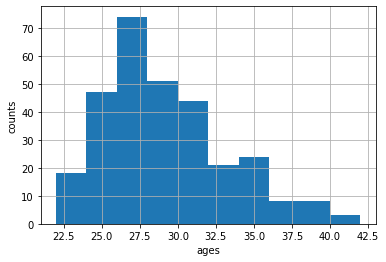

In [49]:
#plot age dist'n
age= gdf['AGE'].astype(float)
age.hist(bins=10)
plt.xlabel('ages')
plt.ylabel('counts')
plt.show()

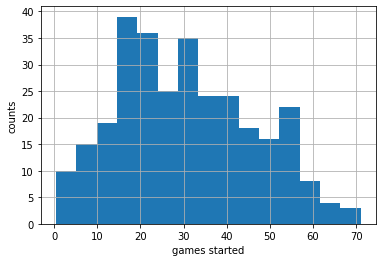

In [50]:
# dist'n of games started
gamestart= gdf['GS']
gamestart.hist(bins=15)
plt.xlabel('games started')
plt.ylabel('counts')
plt.show()

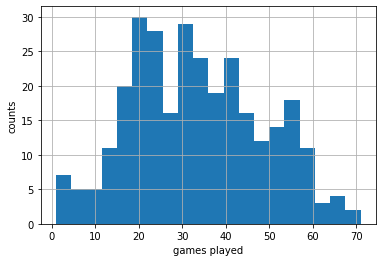

In [60]:
# games played
gamesplayed_g= gdf['GP']
gamesplayed_g.hist(bins=20)
plt.xlabel('games played')
plt.ylabel('counts')
plt.show()

In [77]:
print(  min(gdf.AAV))
print(  max(gdf.AAV))

500000
10500000


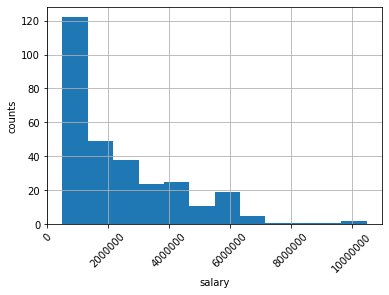

In [94]:
g_salary= gdf['AAV']
g_salary.hist(range=[500000, 10500000],bins=12, log=False)
plt.ticklabel_format(style='plain')
plt.xticks(rotation= 45)
plt.xlabel('salary')
plt.ylabel('counts')
plt.show()

<AxesSubplot:>

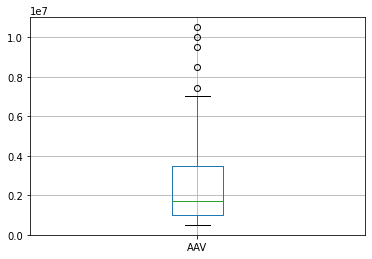

In [93]:
gdf.boxplot(column='AAV')


In [95]:
lessthan2mil= gdf[gdf['AAV']<2000000]
lessthan2mil

,Player,Season,AGE,GP,GS,W,L,TplusOTL,GA,SA,SV,SV_Pct,GAA,SUT,GPS,MIN,QS,RBS,SOT_Att,SOT_Scored,SOT_Saved,SOT_Pct,PTS,LENGTH,AAV
2,Cory Schneider,2021,34,26.000000,23.0,6.000000,13.000000,4.000000,70.000000,718.000000,648.000000,0.903000,3.060000,1.000000,3.400000,1372.000000,10.000000,5.000000,9.000000,5.0,4.000000,44.400000,0.000000,1,700000
3,Craig Anderson,2021,39,50.000000,47.0,17.000000,27.000000,4.000000,163.000000,1676.000000,1513.000000,0.903000,3.510000,2.000000,8.100000,2785.000000,19.000000,8.000000,2.000000,2.0,0.000000,0.000000,2.000000,1,700000
4,Anthony Stolarz,2021,27,13.000000,9.5,4.000000,4.000000,1.500000,33.500000,366.500000,333.000000,0.913500,2.825000,1.000000,2.050000,666.500000,5.000000,1.500000,4.500000,1.5,3.000000,75.000000,0.500000,2,950000
5,Ryan Miller,2020,39,23.666667,19.0,9.666667,6.333333,4.000000,56.000000,667.333333,611.333333,0.915667,2.736667,1.666667,4.100000,1233.333333,11.333333,2.333333,8.666667,3.0,5.666667,43.966667,0.333333,1,1000000
10,Aaron Dell,2020,31,29.000000,24.0,12.333333,9.333333,3.666667,76.333333,791.333333,715.000000,0.902333,2.940000,1.333333,3.866667,1559.666667,10.666667,5.000000,3.666667,1.0,2.666667,75.566667,0.333333,1,800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,Scott Clemmensen,2009,31,40.000000,39.0,25.000000,13.000000,1.000000,94.000000,1138.000000,1044.000000,0.917000,2.390000,2.000000,7.900000,2356.000000,22.000000,5.000000,12.000000,3.0,9.000000,75.000000,0.000000,3,1200000
292,Craig Anderson,2009,28,31.000000,27.0,15.000000,7.000000,5.000000,74.000000,977.000000,903.000000,0.924000,2.710000,3.000000,7.600000,1636.000000,16.000000,6.000000,11.000000,7.0,4.000000,36.400000,1.000000,2,1812500
293,Peter Budaj,2009,26,56.000000,55.0,20.000000,29.000000,5.000000,154.000000,1531.000000,1377.000000,0.899000,2.860000,2.000000,7.600000,3232.000000,27.000000,14.000000,35.000000,13.0,22.000000,62.900000,1.000000,1,1250000
294,Antti Niemi,2009,25,3.000000,2.0,1.000000,1.000000,1.000000,8.000000,59.000000,51.000000,0.864000,3.400000,0.000000,0.100000,141.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1,826875


In [75]:
max(gdf.LENGTH)

12

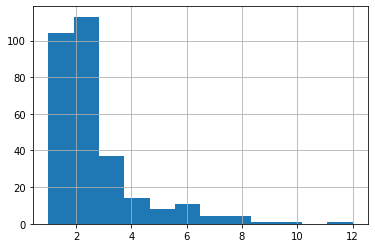

In [76]:
length= gdf['LENGTH'].astype(float)
length.hist(bins=12)
plt.show()

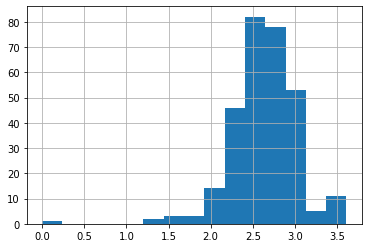

In [61]:
gaa= gdf['GAA']
gaa.hist(bins=15)
plt.show()

In [55]:
gdf[gdf['GAA']< 0.5]

,Player,Season,AGE,GP,GS,W,L,TplusOTL,GA,SA,SV,SV_Pct,GAA,SUT,GPS,MIN,QS,RBS,SOT_Att,SOT_Scored,SOT_Saved,SOT_Pct,PTS,LENGTH,AAV
278,Tuukka Rask,2009,22,1.0,1.0,1.0,0.0,0.0,0.0,35.0,35.0,1.0,0.0,1.0,0.6,60.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1250000


In [67]:
morethanfive= gdf[gdf['GP']>5]

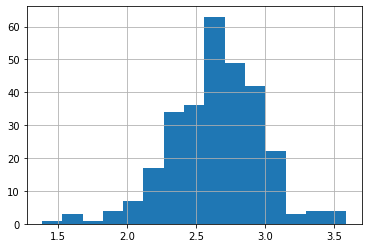

In [68]:
morethanfive.GAA.hist(bins=15)
plt.show()

In [69]:
morethanfive[morethanfive.GAA < 1.7]

,Player,Season,AGE,GP,GS,W,L,TplusOTL,GA,SA,SV,SV_Pct,GAA,SUT,GPS,MIN,QS,RBS,SOT_Att,SOT_Scored,SOT_Saved,SOT_Pct,PTS,LENGTH,AAV
149,Cam Talbot,2014,27,21.000000,19.0,12.0,6.000000,1.000000,33.000000,560.0,527.000000,0.941000,1.640000,3.000000,5.2,1211.000000,16.000000,0.000000,3.0,1.000000,2.000000,66.700000,0.0,1,1450000
166,Chad Johnson,2014,28,15.500000,13.5,9.5,2.000000,2.500000,29.000000,408.0,379.000000,0.939500,1.660000,1.500000,3.2,879.000000,9.000000,1.000000,2.5,1.000000,1.500000,58.350000,0.0,2,1300000
196,Anton Khudobin,2013,27,6.333333,6.0,4.0,1.666667,0.333333,12.333333,173.0,160.666667,0.946667,1.636667,0.666667,1.4,350.666667,3.666667,1.333333,1.0,0.333333,0.666667,22.233333,0.0,1,800000
214,Richard Bachman,2012,24,9.500000,7.5,4.0,2.500000,0.500000,21.500000,240.5,219.000000,0.955000,1.385000,0.500000,1.4,471.500000,4.500000,1.000000,1.5,0.500000,1.000000,33.350000,0.5,1,625000


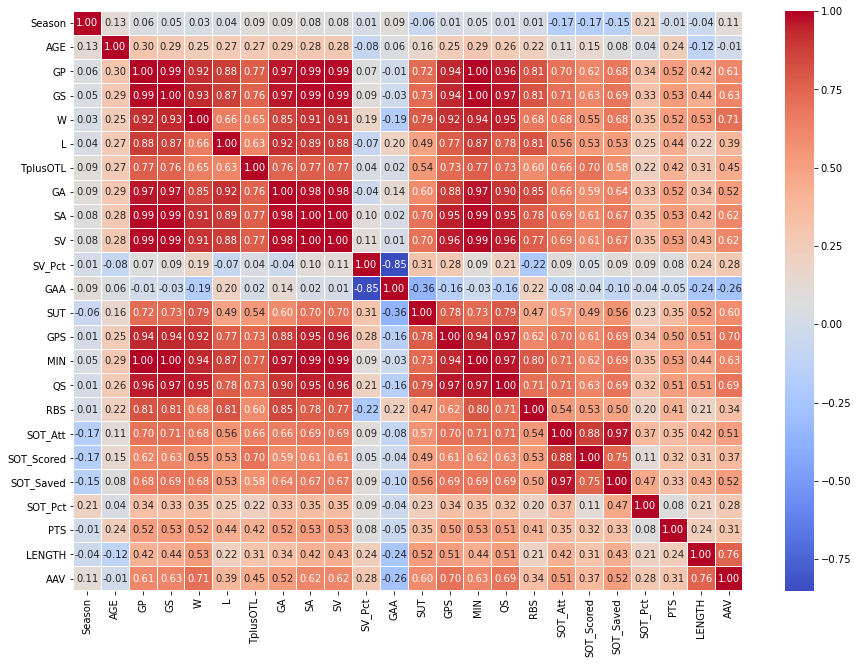

In [84]:
corrmat = gdf.corr()
f, ax = plt.subplots(figsize=(15, 10))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)

In [88]:
gdf.pivot_table(index='AGE', values=['GP','GAA',"SV_Pct",'AAV'], aggfunc=['count','mean'])

count                         mean                               
      AAV GAA  GP SV_Pct           AAV       GAA         GP    SV_Pct
AGE                                                                  
22      7   7   7      7  1.533929e+06  2.128571  18.071429  0.928214
23     11  11  11     11  1.821212e+06  2.627424  24.136364  0.916985
24     17  17  17     17  2.322059e+06  2.641765  28.862745  0.913392
25     30  30  30     30  3.153118e+06  2.634361  32.338889  0.911553
26     35  35  35     35  2.381029e+06  2.696786  31.764286  0.910760
27     39  39  39     39  1.939556e+06  2.669829  27.946581  0.911207
28     23  23  23     23  2.532833e+06  2.579348  31.347826  0.915717
29     28  28  28     28  2.966518e+06  2.591726  35.940476  0.911390
30     22  22  22     22  2.763258e+06  2.608182  35.469697  0.910765
31     22  22  22     22  2.419205e+06  2.724811  35.208333  0.907989
32     11  11  11     11  2.912879e+06  2.601061  38.484848  0.911788
33     10  10  10     10  2.037500e+06  2.747167  37.566667  0.910017
34     17  17  17     17  2.246373e+06  2.667549  39.078431  0.912422
35      7   7   7      7  2.652381e+06  2.665000  42.976190  0.913262
36      5   5   5      5  2.660000e+06  2.518333  41.650000  0.916200
37      3   3   3      3  2.583333e+06  2.746111  42.444444  0.911278
38      4   4   4      4  1.343750e+06  2.827500  41.416667  0.909167
39      4   4   4      4  1.400000e+06  2.708333  41.916667  0.915667
40      2   2   2      2  3.100000e+06  2.483333  45.000000  0.912750
42      1   1   1      1  7.000000e+05  2.315000  44.000000  0.904500

In [89]:
gdf[gdf['AGE']==42]

,Player,Season,AGE,GP,GS,W,L,TplusOTL,GA,SA,SV,SV_Pct,GAA,SUT,GPS,MIN,QS,RBS,SOT_Att,SOT_Scored,SOT_Saved,SOT_Pct,PTS,LENGTH,AAV
151,Martin Brodeur,2014,42,44.0,44.0,22.0,15.0,5.5,100.5,1063.0,962.5,0.9045,2.315,2.5,5.5,2574.5,22.0,8.5,0.0,0.0,0.0,0.0,3.5,1,700000


In [102]:
sns.pairplot(gdf, palette= 'Set1')

Error in callback <function flush_figures at 0x0D3CBB28> (for post_execute):


KeyboardInterrupt: 

## PLAYERS

In [37]:
pdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2702 entries, 0 to 2701
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      2702 non-null   object 
 1   Season      2702 non-null   int64  
 2   AGE         2702 non-null   int64  
 3   Pos_C       2702 non-null   int64  
 4   Pos_LW      2702 non-null   int64  
 5   Pos_RW      2702 non-null   int64  
 6   Pos_D       2702 non-null   int64  
 7   GP          2702 non-null   float64
 8   G           2702 non-null   float64
 9   A           2702 non-null   float64
 10  PTS         2702 non-null   float64
 11  PlusMinus   2702 non-null   float64
 12  ATOI        2702 non-null   float64
 13  TOI(EV)     2699 non-null   float64
 14  PIM         2702 non-null   float64
 15  PS          2702 non-null   float64
 16  EV_A        2702 non-null   float64
 17  PP_A        2702 non-null   float64
 18  SH_A        2702 non-null   float64
 19  GW          2702 non-null  

In [38]:
pdf.describe()

,Season,AGE,Pos_C,Pos_LW,Pos_RW,Pos_D,GP,G,A,PTS,PlusMinus,ATOI,TOI(EV),PIM,PS,EV_A,PP_A,SH_A,GW,S,S_Pct,BLK,HIT,FOW,FOL,FO_Pct,CF,CA,CF_Pct,CF_Pct_rel,FF,FA,FF_Pct,FF_Pct_rel,oiSH_Pct,oiSV_Pct,PDO,oZS_Pct,dZS_Pct,TK,GV,SAtt.,Thru_Pct,SOT_Att,SOT_Scored,SOT_Saved,SOT_Pct,LENGTH,AAV
count,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2699.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2699.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2.702000e+03
mean,2014.710585,27.044041,0.289415,0.366765,0.350111,0.356773,54.676783,8.105693,13.492074,21.597767,-0.021620,15.376890,13.054309,32.571028,2.654965,6.170769,1.691155,0.245651,1.283525,89.197539,8.014341,41.609487,70.042037,82.099926,83.451949,27.448350,681.537811,677.541944,49.725006,-0.934922,508.316586,505.654885,49.752745,-0.950333,8.002665,91.712198,99.654272,50.581523,49.418977,20.499352,23.197971,164.816166,53.256674,1.162472,0.364946,0.797527,8.300268,2.466691,2.292547e+06
std,3.458950,4.147670,0.453575,0.482011,0.477093,0.479136,19.933781,7.280771,10.198743,16.404306,7.324046,3.816859,2.785424,28.211923,2.208046,5.205643,2.417772,0.501401,1.349620,55.504387,5.211874,35.230749,48.329976,159.162153,151.908867,22.205506,330.010560,314.108319,3.972158,3.959634,246.465341,235.792536,3.984854,3.991276,3.135565,2.704262,4.438825,7.277523,7.277577,13.742074,15.841712,97.804257,9.289667,2.101202,0.824204,1.384519,16.064593,1.826671,1.921194e+06
min,2009.000000,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-26.500000,4.016667,4.000000,0.000000,-1.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,25.000000,-28.100000,1.000000,2.000000,23.250000,-30.250000,0.000000,44.850000,48.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.750000e+05
25%,2012.000000,24.000000,0.000000,0.000000,0.000000,0.000000,42.000000,2.500000,6.000000,9.000000,-4.333333,12.718056,11.127778,14.000000,0.900000,2.000000,0.000000,0.000000,0.333333,46.666667,4.450000,17.000000,35.000000,0.000000,0.000000,0.000000,428.000000,446.000000,47.400000,-3.300000,317.750000,330.375000,47.433333,-3.225000,6.866667,90.933333,98.566667,46.654167,45.433333,9.666667,11.333333,90.000000,47.233333,0.000000,0.000000,0.000000,0.000000,1.000000,8.032500e+05
50%,2015.000000,26.000000,0.000000,0.000000,0.000000,0.000000,59.500000,6.000000,11.000000,17.000000,-0.500000,15.373611,13.072222,25.333333,2.200000,4.666667,0.666667,0.000000,1.000000,81.333333,7.533333,30.333333,59.666667,3.500000,6.166667,33.333333,687.000000,691.500000,49.866667,-0.800000,508.333333,514.333333,49.858333,-0.800000,8.000000,91.800000,99.800000,50.700000,49.300000,18.666667,20.000000,151.666667,55.033333,0.000000,0.000000,0.000000,0.000000,2.000000,1.500000e+06
75%,2018.000000,29.000000,1.000000,1.000000,1.000000,1.000000,70.333333,12.000000,19.000000,31.000000,3.666667,17.938889,14.919444,41.333333,3.950000,9.000000,2.666667,0.333333,2.000000,124.000000,10.966667,53.500000,94.333333,71.750000,89.500000,46.825000,931.250000,905.000000,52.200000,1.533333,693.916667,678.916667,52.100000,1.400000,8.966667,92.733333,100.966667,54.566667,53.345833,28.666667,32.500000,224.000000,59.466667,1.333333,0.333333,1.000000,11.100000,3.000000,3.250000e+06
max,2021.000000,45.000000,1.000000,1.000000,1.000000,1.000000,83.000000,43.500000,67.000000,94.500000,37.000000,27.333333,21.400000,230.500000,11.266667,30.000000,19.000000,5.000000,9.000000,330.500000,100.000000,237.000000,368.666667,971.6666

In [39]:
#pdf.isnull().sum()

Player        0
Season        0
AGE           0
Pos_C         0
Pos_LW        0
Pos_RW        0
Pos_D         0
GP            0
G             0
A             0
PTS           0
PlusMinus     0
ATOI          0
TOI(EV)       3
PIM           0
PS            0
EV_A          0
PP_A          0
SH_A          0
GW            0
S             0
S_Pct         0
BLK           0
HIT           0
FOW           0
FOL           0
FO_Pct        0
CF            0
CA            0
CF_Pct        0
CF_Pct_rel    0
FF            0
FA            0
FF_Pct        0
FF_Pct_rel    0
oiSH_Pct      0
oiSV_Pct      0
PDO           0
oZS_Pct       0
dZS_Pct       0
TK            0
GV            0
SAtt.         3
Thru_Pct      0
SOT_Att       0
SOT_Scored    0
SOT_Saved     0
SOT_Pct       0
LENGTH        0
AAV           0
dtype: int64

In [42]:
pdf.corr()

,Season,AGE,Pos_C,Pos_LW,Pos_RW,Pos_D,GP,G,A,PTS,PlusMinus,ATOI,TOI(EV),PIM,PS,EV_A,PP_A,SH_A,GW,S,S_Pct,BLK,HIT,FOW,FOL,FO_Pct,CF,CA,CF_Pct,CF_Pct_rel,FF,FA,FF_Pct,FF_Pct_rel,oiSH_Pct,oiSV_Pct,PDO,oZS_Pct,dZS_Pct,TK,GV,SAtt.,Thru_Pct,SOT_Att,SOT_Scored,SOT_Saved,SOT_Pct,LENGTH,AAV
Season,1.000000,-0.059188,0.062140,0.096555,0.070623,-0.004245,-0.109176,-0.064922,-0.096002,-0.088500,-0.037324,-0.058815,0.045280,-0.291509,-0.095764,-0.029618,-0.121730,-0.050145,-0.062703,-0.076941,0.006526,-0.032563,-0.047661,-0.034482,-0.024149,0.015436,-0.025435,-0.018619,-0.010593,0.132685,-0.035805,-0.029387,-0.023146,0.131689,0.012880,-0.032534,-0.015370,-0.042184,0.042189,-0.060865,0.017396,-0.067704,0.019372,-0.122501,-0.109914,-0.120480,-0.069162,-0.014417,0.055850
AGE,-0.059188,1.000000,-0.040430,-0.079010,-0.058311,0.038293,0.267693,0.088418,0.193272,0.159402,0.009810,0.196925,0.130171,0.196083,0.164691,0.059501,0.128655,0.051112,0.099039,0.162802,0.002696,0.221778,0.125498,0.105949,0.072945,0.050959,0.231404,0.251267,-0.035460,-0.105004,0.232037,0.250054,-0.036175,-0.102557,0.006426,0.030736,0.026852,-0.133256,0.133255,0.126088,0.231170,0.169619,0.022415,0.013973,0.023645,0.007130,0.006365,-0.135875,0.010058
Pos_C,0.062140,-0.040430,1.000000,0.034190,-0.061228,-0.475298,0.088234,0.211742,0.127758,0.173407,-0.057267,-0.161400,-0.243078,-0.122055,-0.052266,0.221072,0.112823,0.233314,0.192449,0.114810,0.239167,-0.229830,-0.106956,0.689262,0.709050,0.560928,-0.045210,-0.037072,-0.062684,-0.030691,-0.048025,-0.042551,-0.057160,-0.026755,0.016765,-0.019191,-0.011956,-0.132338,0.132338,0.237410,-0.079396,0.040756,0.315198,0.205804,0.193644,0.197061,0.195706,0.022364,0.040823
Pos_LW,0.096555,-0.079010,0.034190,1.000000,0.236729,-0.549160,0.054214,0.275568,0.032581,0.142562,-0.030203,-0.317007,-0.350942,0.048706,-0.058321,0.313255,0.124714,0.145240,0.203620,0.134508,0.299057,-0.382756,0.054715,-0.009530,0.001950,0.338462,-0.103328,-0.120703,0.008058,0.024458,-0.104257,-0.120171,0.008892,0.023699,0.003420,-0.002593,-0.002735,0.020089,-0.020078,0.116058,-0.155128,0.054873,0.356406,0.129219,0.085199,0.145390,0.125163,-0.023754,-0.014771
Pos_RW,0.070623,-0.058311,-0.061228,0.236729,1.000000,-0.535297,0.046720,0.269030,0.027215,0.136324,-0.071790,-0.315396,-0.347952,0.026151,-0.062206,0.297443,0.151870,0.090717,0.186653,0.156797,0.255510,-0.372992,0.031475,-0.087919,-0.073549,0.309033,-0.109631,-0.126323,0.003828,0.010473,-0.110090,-0.124155,0.006898,0.018101,0.005023,-0.024986,-0.010048,0.022064,-0.022060,0.118566,-0.157626,0.081052,0.309191,0.204992,0.173725,0.207687,0.174515,-0.016776,-0.026870
Pos_D,-0.004245,0.038293,-0.475298,-0.549160,-0.535297,1.000000,-0.110157,-0.465724,-0.118650,-0.280470,0.073062,0.525830,0.627595,-0.043033,0.112928,-0.512819,-0.243140,-0.268370,-0.377295,-0.256029,-0.484919,0.634125,0.018698,-0.371990,-0.395853,-0.738734,0.183679,0.203261,0.038325,0.030316,0.184769,0.203099,0.034239,0.023636,0.029436,0.002279,0.032193,0.061689,-0.061700,-0.280597,0.253063,-0.103952,-0.646828,-0.322958,-0.265686,-0.331971,-0.272563,0.022889,0.016847
GP,-0.109176,0.267693,0.088234,0.054214,0.046720,-0.110157,1.000000,0.591273,0.679265,0.684733,0.085366,0.439703,0.343467,0.416693,0.618743,0.596713,0.436891,0.285110,0.506271,0.753830,0.188872,0.441194,0.475499,0.307314,0.316262,0.242488,0.856192,0.870985,0.116172,0.057898,0.858252,0.871019,0.104966,0.043321,0.086034,0.035864,0.112374,-0.117626,0.117578,0.699365,0.638624,0.766058,0.183494,0.307549,0.246774,0.319845,0.229727,0.309611,0.472531
G,-0.064922,0.088418,0.211742,0.275568,0.269030,-0.465724,0.591273,1.000000,0.754681,0.913027,0.195225,0.275065,0.147435,0.132645,0.725147,0.972282,0.841342,0.369958,0.859515,0.874576,0.549784,-0.125503,0.098669,0.381924,0.401628,0.441406,0.560891,0.489542,0.267245,0.291350,0.560682,0.498670,0.234942,0.249217,0.188076,-0.074868,0.099886,0.123262,-0.123281,0.733342,0.431773,0.803092,0.363812,0.595293,0.490452,0.611475,0.444031,0.412931,0.616056
A,-0.096

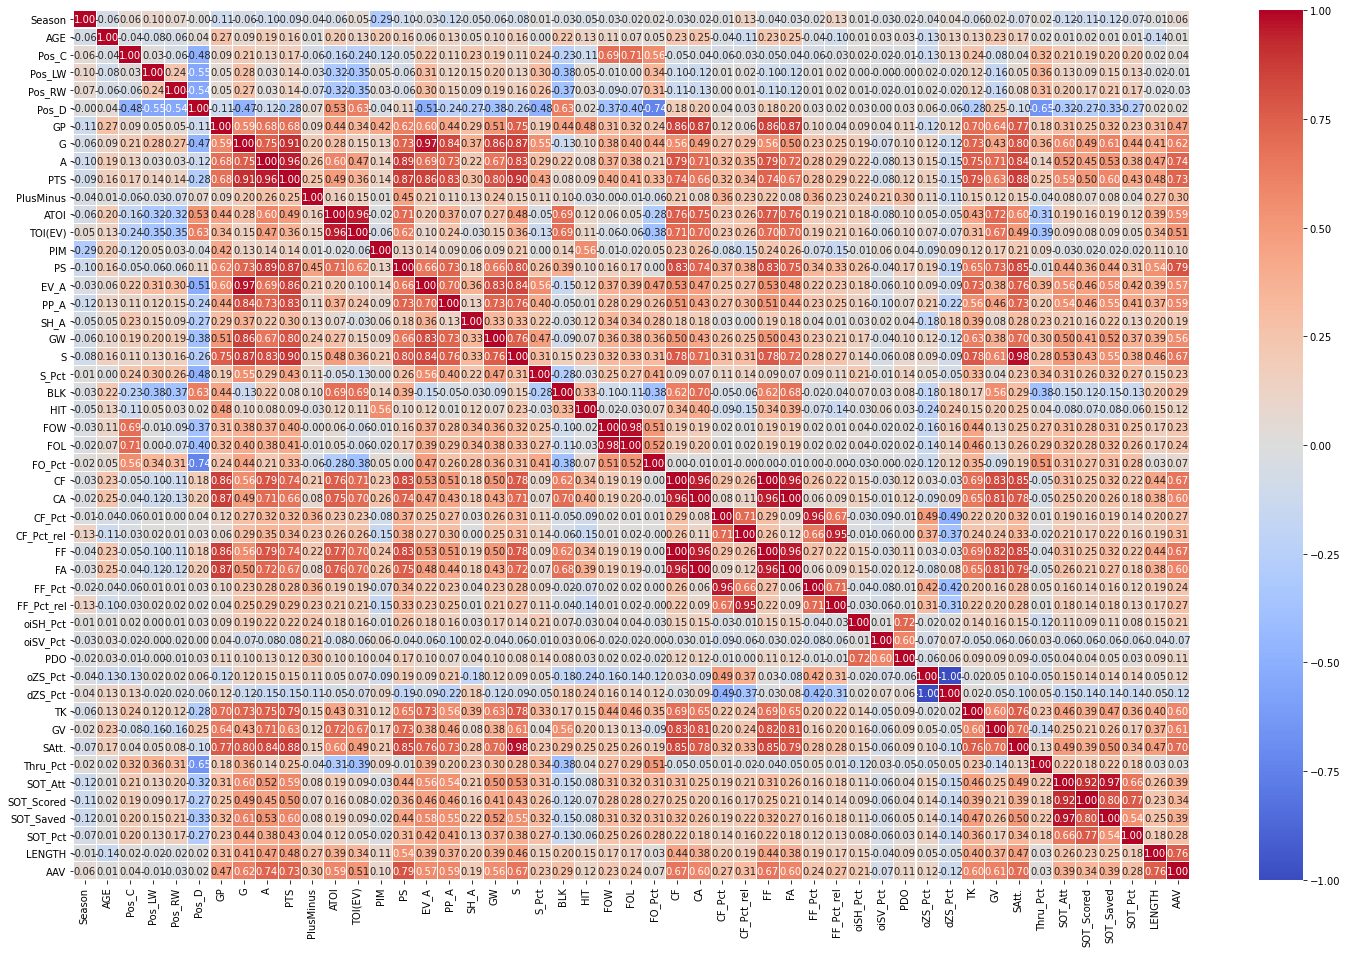

In [100]:
corrmat = pdf.corr()
f, ax = plt.subplots(figsize=(25, 15))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)